# Packages

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

import imblearn

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn. neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, plot_confusion_matrix, ConfusionMatrixDisplay

from sklearn.model_selection import cross_val_score, GridSearchCV

# Functions

In [66]:
def load_data(file_name:str, skiprows:int = 0):
  """Loads the data we want to work with

  Args:
      file_name (str): The name of the file we want to work with.

  Returns:
      pandas.DataFrame: A table containing the information we want to explore.
  """
  columns = [
    "age",
    "workclass",
    "fnlwgt",
    "education",
    "education-num",
    "marital-status",
    "occupation",
    "relationship",
    "race",
    "sex",
    "capital-gain",
    "capital-loss",
    "hours-per-week",
    "native-country",
    "class"
  ]
  return pd.read_csv(file_name, names=columns, skiprows=skiprows, sep=", ")

# Load the data

Here we are going to load the data already preprocessed in the `data_preparation.ipynb`.

In [86]:
final_train_data = pd.read_csv("./data/final_train_data.csv")
final_test_data  = pd.read_csv("./data/final_test_data.csv")

# Spliting the data into train and test sets

In [7]:
X = final_train_data.select_dtypes("float64").values
y = final_train_data["target"].values

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Oversampling with SMOTE

If we count the number of of values from each class in the `y_train` we will see that they are not balanced:

In [15]:
unique, count = np.unique(y_train, return_counts=True)
y_train_dict_values = {k:v for (k,v) in zip(unique, count)}
y_train_dict_values

{0: 18506, 1: 5914}

Thus, we applied the `SMOTE`:

In [17]:
sm = imblearn.over_sampling.SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train)

This will make them equal.

In [18]:
unique, count = np.unique(y_train_res, return_counts=True)
y_train_dict_values = {k:v for (k,v) in zip(unique, count)}
y_train_dict_values

{0: 18506, 1: 18506}

# Fitting data

In [22]:
gnb_clf = GaussianNB()
svc_clf = SVC()
knn_clf = KNeighborsClassifier()
lg_clf  = LogisticRegression()
rfc_clf = RandomForestClassifier()
ad_clf  = AdaBoostClassifier()
gb_clf  = GradientBoostingClassifier()
xgb_clf = XGBClassifier()

In [39]:
def model_results(model, X_train, y_train):
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  test_score  = accuracy_score(y_test, y_pred)
  train_score = accuracy_score(y_train, model.predict(X_train))
  
  print(model)
  print(f"Accuracy for train data: {accuracy_score(y_test, y_pred):.2f}")
  print(f"Accuracy for test data: {accuracy_score(y_train, model.predict(X_train)):.2f}")
  print(classification_report(y_test, y_pred))
  plot_confusion_matrix(model, X_test, y_test, cmap='Blues')

## Training on the umbalanced data

GaussianNB()
Accuracy for train data: 0.81
Accuracy for test data: 0.81
              precision    recall  f1-score   support

           0       0.83      0.95      0.88      6214
           1       0.69      0.36      0.47      1927

    accuracy                           0.81      8141
   macro avg       0.76      0.65      0.68      8141
weighted avg       0.79      0.81      0.79      8141



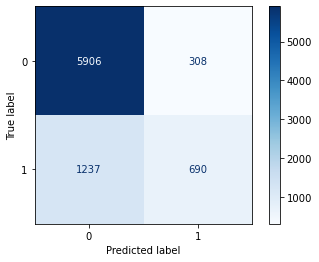

In [40]:
model_results(gnb_clf, X_train, y_train)

SVC()
Accuracy for train data: 0.85
Accuracy for test data: 0.86
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      6214
           1       0.76      0.55      0.64      1927

    accuracy                           0.85      8141
   macro avg       0.82      0.75      0.77      8141
weighted avg       0.85      0.85      0.84      8141



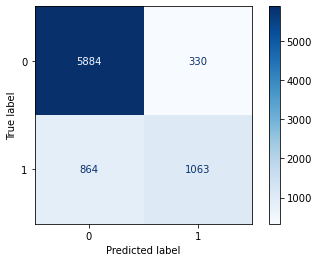

In [42]:
model_results(svc_clf, X_train, y_train)

KNeighborsClassifier()
Accuracy for train data: 0.84
Accuracy for test data: 0.88
              precision    recall  f1-score   support

           0       0.88      0.91      0.89      6214
           1       0.67      0.60      0.63      1927

    accuracy                           0.84      8141
   macro avg       0.77      0.75      0.76      8141
weighted avg       0.83      0.84      0.83      8141



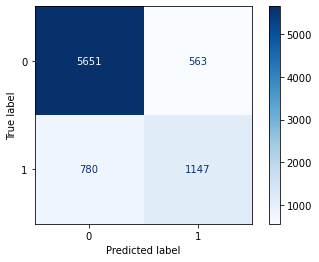

In [43]:
model_results(knn_clf, X_train, y_train)

LogisticRegression()
Accuracy for train data: 0.83
Accuracy for test data: 0.82
              precision    recall  f1-score   support

           0       0.85      0.94      0.89      6214
           1       0.71      0.45      0.56      1927

    accuracy                           0.83      8141
   macro avg       0.78      0.70      0.72      8141
weighted avg       0.82      0.83      0.81      8141



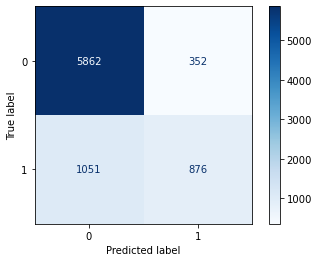

In [44]:
model_results(lg_clf, X_train, y_train)

RandomForestClassifier()
Accuracy for train data: 0.86
Accuracy for test data: 1.00
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      6214
           1       0.74      0.63      0.68      1927

    accuracy                           0.86      8141
   macro avg       0.82      0.78      0.80      8141
weighted avg       0.86      0.86      0.86      8141



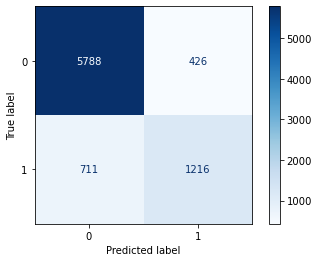

In [45]:
model_results(rfc_clf, X_train, y_train)

GradientBoostingClassifier()
Accuracy for train data: 0.87
Accuracy for test data: 0.87
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      6214
           1       0.79      0.61      0.69      1927

    accuracy                           0.87      8141
   macro avg       0.84      0.78      0.80      8141
weighted avg       0.86      0.87      0.86      8141



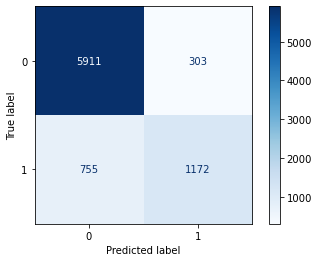

In [47]:
model_results(gb_clf, X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
Accuracy for train data: 0.87
Accuracy for test data: 0.91
              precision    recall  f1-score   support

           0       0.90      0.93      0.92      6214
           1       0.76      0.67      0.71      1927

    accuracy                           0.87      8141
   macro avg       0.83 

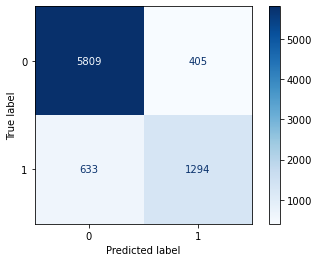

In [48]:
model_results(xgb_clf, X_train, y_train)

## Training on the balanced data

GaussianNB()
Accuracy for train data: 0.82
Accuracy for test data: 0.71
              precision    recall  f1-score   support

           0       0.86      0.92      0.89      6214
           1       0.67      0.50      0.57      1927

    accuracy                           0.82      8141
   macro avg       0.77      0.71      0.73      8141
weighted avg       0.81      0.82      0.81      8141



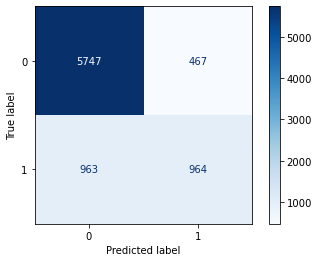

In [49]:
model_results(gnb_clf, X_train_res, y_train_res)

SVC()
Accuracy for train data: 0.80
Accuracy for test data: 0.84
              precision    recall  f1-score   support

           0       0.95      0.79      0.86      6214
           1       0.56      0.86      0.68      1927

    accuracy                           0.80      8141
   macro avg       0.75      0.82      0.77      8141
weighted avg       0.86      0.80      0.82      8141



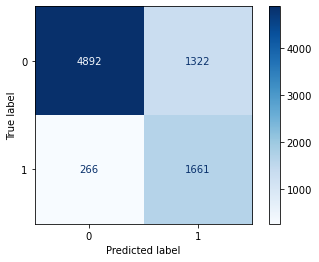

In [50]:
model_results(svc_clf, X_train_res, y_train_res)

KNeighborsClassifier()
Accuracy for train data: 0.79
Accuracy for test data: 0.91
              precision    recall  f1-score   support

           0       0.92      0.79      0.85      6214
           1       0.53      0.78      0.63      1927

    accuracy                           0.79      8141
   macro avg       0.73      0.78      0.74      8141
weighted avg       0.83      0.79      0.80      8141



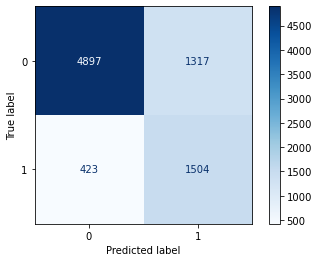

In [51]:
model_results(knn_clf, X_train_res, y_train_res)

LogisticRegression()
Accuracy for train data: 0.77
Accuracy for test data: 0.77
              precision    recall  f1-score   support

           0       0.92      0.77      0.84      6214
           1       0.51      0.77      0.61      1927

    accuracy                           0.77      8141
   macro avg       0.71      0.77      0.72      8141
weighted avg       0.82      0.77      0.78      8141



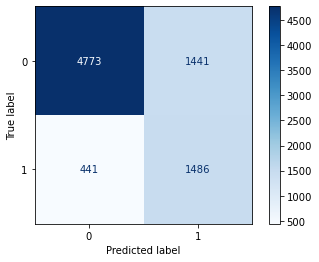

In [52]:
model_results(lg_clf, X_train_res, y_train_res)

RandomForestClassifier()
Accuracy for train data: 0.85
Accuracy for test data: 1.00
              precision    recall  f1-score   support

           0       0.91      0.89      0.90      6214
           1       0.67      0.71      0.69      1927

    accuracy                           0.85      8141
   macro avg       0.79      0.80      0.80      8141
weighted avg       0.85      0.85      0.85      8141



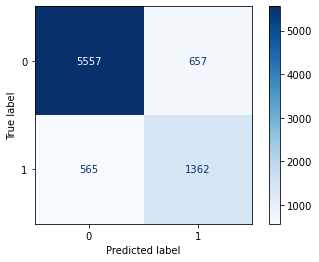

In [53]:
model_results(rfc_clf, X_train_res, y_train_res)

GradientBoostingClassifier()
Accuracy for train data: 0.83
Accuracy for test data: 0.87
              precision    recall  f1-score   support

           0       0.94      0.84      0.89      6214
           1       0.61      0.81      0.70      1927

    accuracy                           0.83      8141
   macro avg       0.77      0.83      0.79      8141
weighted avg       0.86      0.83      0.84      8141



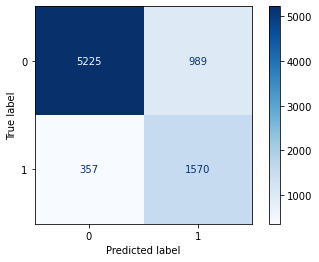

In [54]:
model_results(gb_clf, X_train_res, y_train_res)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
Accuracy for train data: 0.86
Accuracy for test data: 0.93
              precision    recall  f1-score   support

           0       0.91      0.91      0.91      6214
           1       0.71      0.73      0.72      1927

    accuracy                           0.86      8141
   macro avg       0.81 

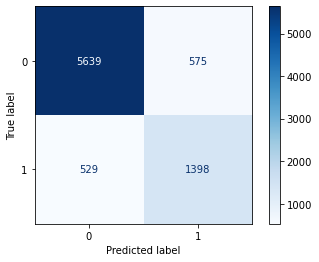

In [55]:
model_results(xgb_clf, X_train_res, y_train_res)

Therefore we are going we the `XGBClassifier`, since it has a more balanced values for `precision` and `recall`.

# Cross validation

In [61]:
[[i, cross_val_score(xgb_clf, X, y, cv=i).mean()] for i in range(2, 9)]

[[2, 0.8660975501356927],
 [3, 0.8681245091298391],
 [4, 0.869322275061742],
 [5, 0.8692609111770789],
 [6, 0.869414372803405],
 [7, 0.8707352031918834],
 [8, 0.8706123253286112]]

# Finding best hyperparameters with GridSearchCV

In [63]:
# params = {
#   'gamma': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4, 200],
#   'learning_rate': [0.01, 0.03, 0.06, 0.1, 0.15, 0.2, 0.25, 0.300000012, 0.4, 0.5, 0.6, 0.7],
#   'max_depth': [5,6,7,8,9,10,11,12,13,14],
#   'n_estimators': [50,65,80,100,115,130,150],
#   'reg_alpha': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200],
#   'reg_lambda': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200]}

params = {
        "subsample": [0.5, 0.75, 1],
        "colsample_bytree": [0.5, 0.75, 1],
        "max_depth": [2, 6, 12],
        "min_child_weight": [1, 5, 15],
        "learning_rate": [0.3, 0.1, 0.03],
        "n_estimators": [50, 75, 100]
        }

gcv = GridSearchCV(xgb_clf, params)

res = gcv.fit(X_train_res, y_train_res)

res.best_params_

{'colsample_bytree': 0.5,
 'learning_rate': 0.1,
 'max_depth': 12,
 'min_child_weight': 1,
 'n_estimators': 75,
 'subsample': 1}

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=12, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=75, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
Accuracy for train data: 0.87
Accuracy for test data: 0.94
              precision    recall  f1-score   support

           0       0.92      0.91      0.91      6214
           1       0.71      0.73      0.72      1927

    accuracy                           0.87      8141
   macro avg       0.81      0

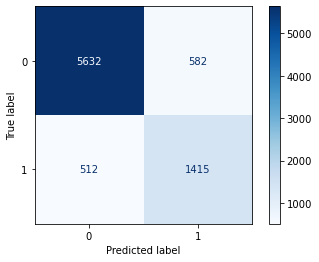

In [64]:
xgb_tunned_clf = XGBClassifier(
  colsample_bytree=0.5, 
  learning_rate=0.1,
  max_depth=12,
  min_child_weight=1,
  n_estimators=75,
  subsample=1)

model_results(xgb_tunned_clf, X_train_res, y_train_res)

Using the GridSearchCV we were able to increase our accuracy in `1%`.

# Feature importance

In [65]:
ft_imp = pd.Series(
    xgb_tunned_clf.feature_importances_,
    index=final_train_data.select_dtypes("float64").columns
    ).sort_values(ascending=False)

ft_imp

marital-status    0.395774
relationship      0.174684
capital-gain      0.096207
education-num     0.081213
age               0.046627
occupation        0.041685
sex               0.040439
capital-loss      0.031808
hours-per-week    0.027538
workclass         0.018491
education         0.014002
race              0.011714
native-country    0.011219
fnlwgt            0.008598
dtype: float32

Lets see if the model performs better without the `fnlwgt`, since it has the lowest importance and it also presented a negative correlation with income.

In [73]:
X = final_train_data[
  final_train_data.select_dtypes("float64").columns[final_train_data.select_dtypes("float64").columns != "fnlwgt"]
].values
y = final_train_data["target"].values

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [76]:
sm = imblearn.over_sampling.SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=12, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=75, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
Accuracy for train data: 0.86
Accuracy for test data: 0.93
              precision    recall  f1-score   support

           0       0.92      0.89      0.91      6214
           1       0.68      0.76      0.72      1927

    accuracy                           0.86      8141
   macro avg       0.80      0

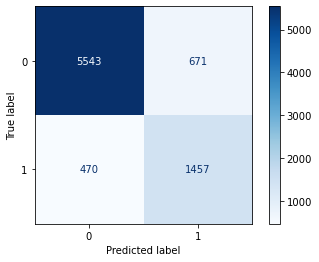

In [77]:
xgb_tunned_clf = XGBClassifier(
  colsample_bytree=0.5, 
  learning_rate=0.1,
  max_depth=12,
  min_child_weight=1,
  n_estimators=75,
  subsample=1)

model_results(xgb_tunned_clf, X_train_res, y_train_res)

The accuracy lowered `1%`.

# test data

Now, lets train the model using the whole `final_train_data` and then use it to predict the values within the `final_test_data`.

In [78]:
X_train = final_train_data.select_dtypes("float64").values
y_train = final_train_data["target"].values

In [88]:
X_test = final_test_data.select_dtypes("float64").values
y_test = final_test_data["target"].values

In [79]:
sm = imblearn.over_sampling.SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train)

In [80]:
xgb_tunned_clf = XGBClassifier(
  colsample_bytree=0.5, 
  learning_rate=0.1,
  max_depth=12,
  min_child_weight=1,
  n_estimators=75,
  subsample=1)

In [81]:
def model_results(model, X_train, y_train, X_test, y_test):
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  test_score  = accuracy_score(y_test, y_pred)
  train_score = accuracy_score(y_train, model.predict(X_train))
  
  print(model)
  print(f"Accuracy for train data: {accuracy_score(y_test, y_pred):.2f}")
  print(f"Accuracy for test data: {accuracy_score(y_train, model.predict(X_train)):.2f}")
  print(classification_report(y_test, y_pred))
  plot_confusion_matrix(model, X_test, y_test, cmap='Blues')

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=12, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=75, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
Accuracy for train data: 0.87
Accuracy for test data: 0.92
              precision    recall  f1-score   support

           0       0.89      0.94      0.91     12435
           1       0.76      0.63      0.69      3846

    accuracy                           0.87     16281
   macro avg       0.83      0

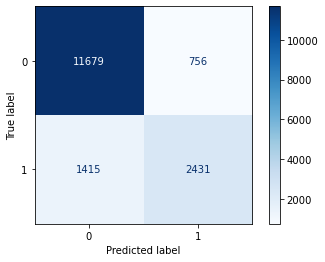

In [89]:
model_results(xgb_tunned_clf, X_train, y_train, X_test, y_test)

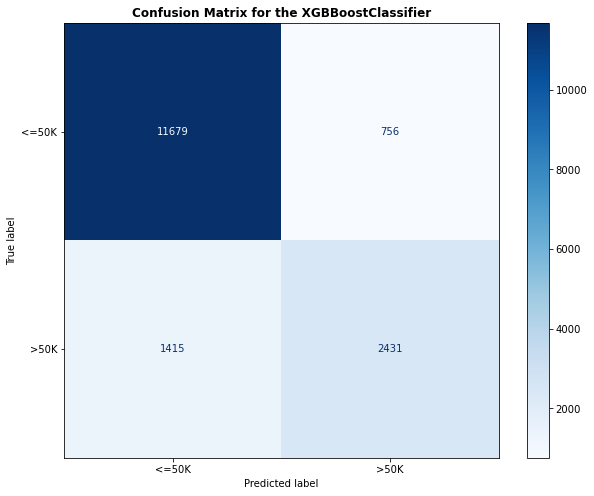

In [104]:
xgb_tunned_clf.fit(X_train, y_train)
y_pred = xgb_tunned_clf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=["<=50K", ">50K"])

fig, ax = plt.subplots(figsize=(10,8))
cmd.plot(cmap="Blues", ax=ax)

ax.set_title("Confusion Matrix for the XGBBoostClassifier", weight="bold")

fig.savefig("./figures/confusion_matrix.pdf", bbox_inches="tight")
fig.savefig("./figures/confusion_matrix.png", bbox_inches="tight")